In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
dataFrame_X = pd.DataFrame(boston.data, columns= boston.feature_names)
print(dataFrame_X.head(5))
dataFrame_Y = pd.DataFrame(boston.target)
print(dataFrame_Y.head(5))

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [4]:
dataFrame_X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(dataFrame_X,dataFrame_Y,test_size = 0.33,random_state=42)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [7]:
nuralNetworkModel = Sequential()

# The Input Layer :
nuralNetworkModel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
nuralNetworkModel.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
nuralNetworkModel.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
nuralNetworkModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2

In [8]:
nuralNetworkModel.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
23/23 [==============================] - 1s 24ms/step - loss: 14.1355 - mean_absolute_error: 14.1355 - val_loss: 6.1095 - val_mean_absolute_error: 6.1095
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 5.8868 - mean_absolute_error: 5.8868 - val_loss: 5.6849 - val_mean_absolute_error: 5.6849
Epoch 3/100
23/23 [==============================] - 0s 10ms/step - loss: 6.7674 - mean_absolute_error: 6.7674 - val_loss: 5.0123 - val_mean_absolute_error: 5.0123
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 6.3387 - mean_absolute_error: 6.3387 - val_loss: 7.0886 - val_mean_absolute_error: 7.0886
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 6.3895 - mean_absolute_error: 6.3895 - val_loss: 5.6056 - val_mean_absolute_error: 5.6056
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 5.4938 - mean_absolute_error: 5.4938 - val_loss: 5.2342 - val_mean_absolute_error: 5.2342
Epoch 7/100
23/23 

In [9]:
predictValues = nuralNetworkModel.predict(X_test)

MAE: 2.813615660182016
MSE: 19.231791960952584
RMSE: 4.385406704166967


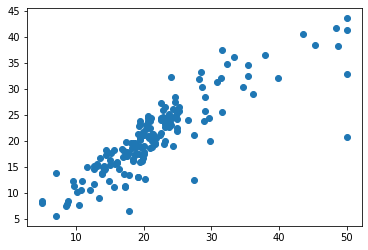

In [10]:

plt.scatter(Y_test,predictValues)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictValues))
print('MSE:', metrics.mean_squared_error(Y_test, predictValues))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictValues)))